In [24]:
#Імпрот необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
#Підключення до гугл-диска
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Зчитування даних
df = pd.read_csv('/content/drive/MyDrive/internet_service_churn.csv')

In [27]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [28]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [29]:
#Видалення колонки id
df=df.drop(columns=['id'])

In [30]:
#Видалення дублікатів
df.drop_duplicates(inplace=True)

In [31]:
df.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,70125.000000,70125.000000,70125.000000,70125.000000,49640.000000,70125.000000,69940.000000,69940.000000,70125.000000,70125.000000
mean,0.824613,0.340321,2.485526,19.237447,0.723528,0.282039,44.909335,4.309101,0.207472,0.543273
std,0.380300,0.473820,2.043719,13.191721,0.693815,0.827224,63.857882,9.929691,0.996518,0.498128
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.950000,13.000000,0.000000,0.000000,8.200000,0.600000,0.000000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.610000,0.000000,29.150000,2.200000,0.000000,1.000000
75%,1.000000,1.000000,3.370000,23.000000,1.320000,0.000000,61.800000,5.000000,0.000000,1.000000
max,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [32]:
# Виявлення відсутніх значень
missing_values = df.isnull().sum()
print(missing_values)

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             20485
service_failure_count              0
download_avg                     185
upload_avg                       185
download_over_limit                0
churn                              0
dtype: int64


In [33]:
#Замінимо відсутні значенняу стовпчику залишок контракту на 0, оскільки дані відсутні то будемо вважати що контракт закінчився
df['reamining_contract'] = df['reamining_contract'].fillna(0)
#Замінимо відсутні значення у стовпчиках завантаження та вивантаження на середнє значення
df['download_avg'].fillna(df['download_avg'].mean(), inplace=True)
df['upload_avg'].fillna(df['upload_avg'].mean(), inplace=True)

In [34]:
# Виявлення відсутніх значень після редагування
missing_values = df.isnull().sum()
print(missing_values)

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


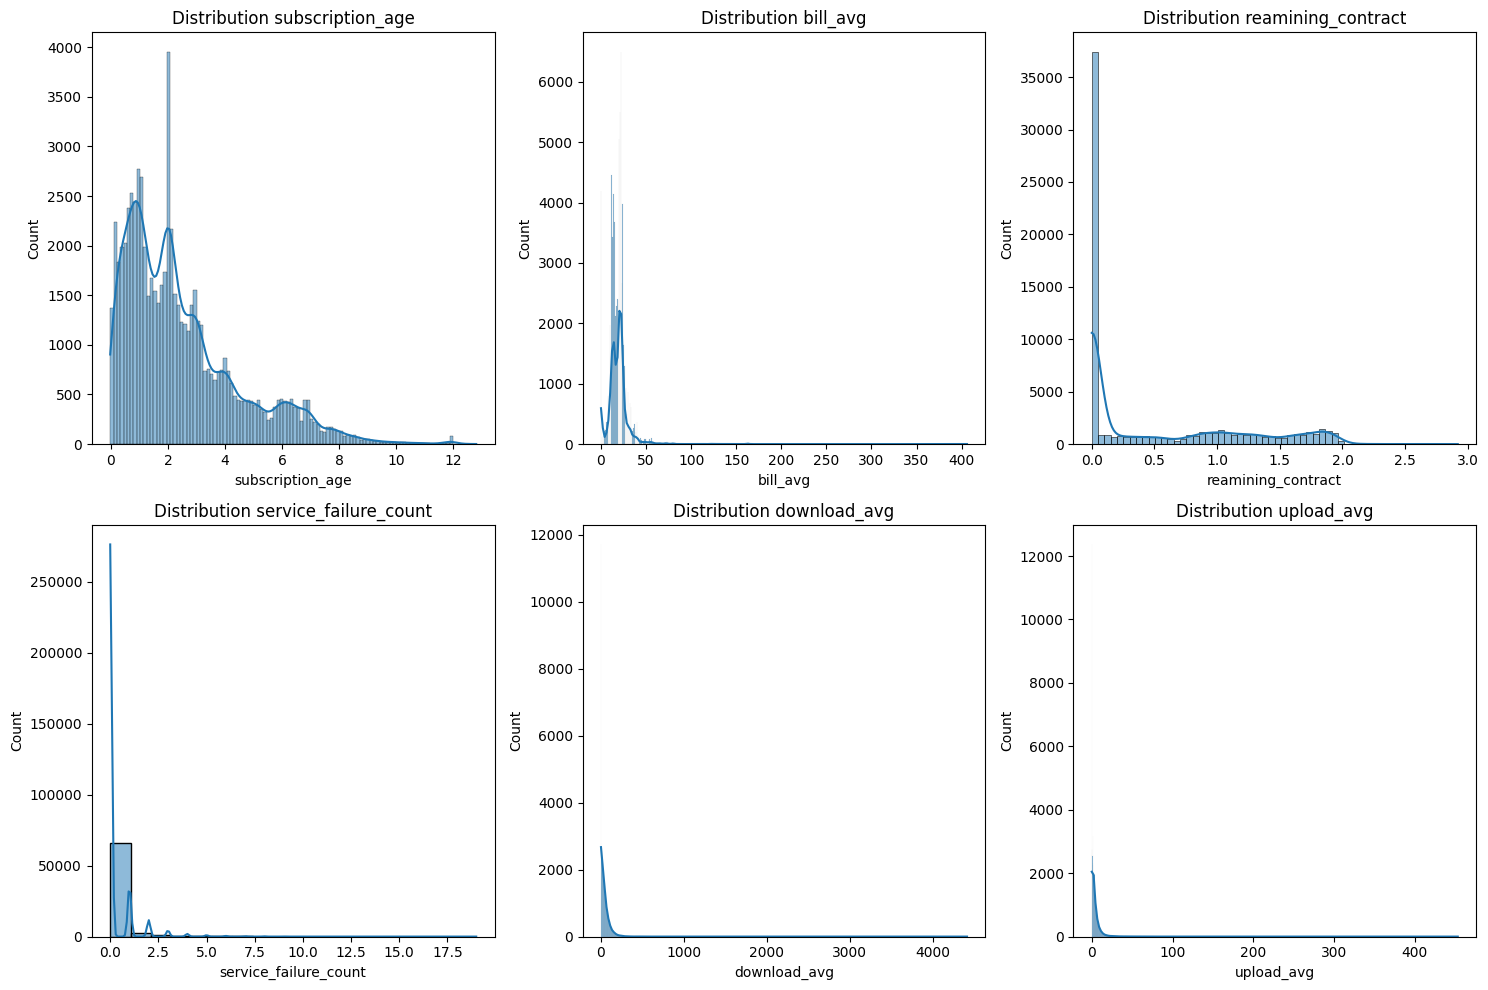

In [35]:
# Вивчення розподілів числових змінних
numeric_cols = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count','download_avg', 'upload_avg']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

In [36]:
# Обчислення матриці кореляцій
correlation_matrix = df.corr()

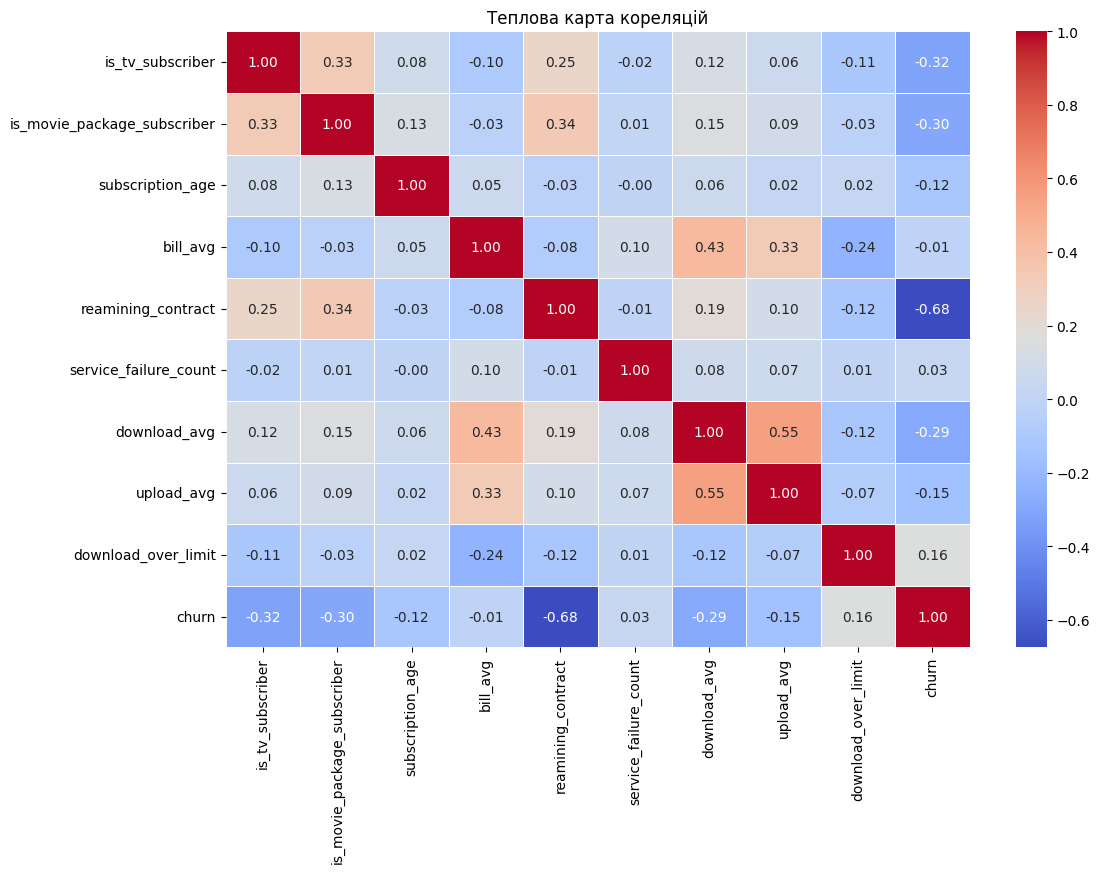

In [37]:
# Візуалізація теплової карти кореляцій
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляцій')
plt.show()

In [38]:
# Виявлення аномалій за допомогою IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers_iqr = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
df = df_no_outliers_iqr

In [40]:
# Ініціалізація нормалізатора
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
4,0,0,0.913105,0.000000,0.000000,0.0,0.0,0.0,0,1
12,0,0,0.948718,0.263158,0.000000,0.0,0.0,0.0,0,1
13,0,0,0.790598,0.368421,0.000000,0.0,0.0,0.0,0,1
14,0,0,0.995726,0.605263,0.109375,0.0,0.0,0.0,0,1
18,0,0,0.972934,0.368421,0.000000,0.0,0.0,0.0,0,1


In [41]:
# Обчислення матриці кореляцій
correlation_matrix = df.corr()

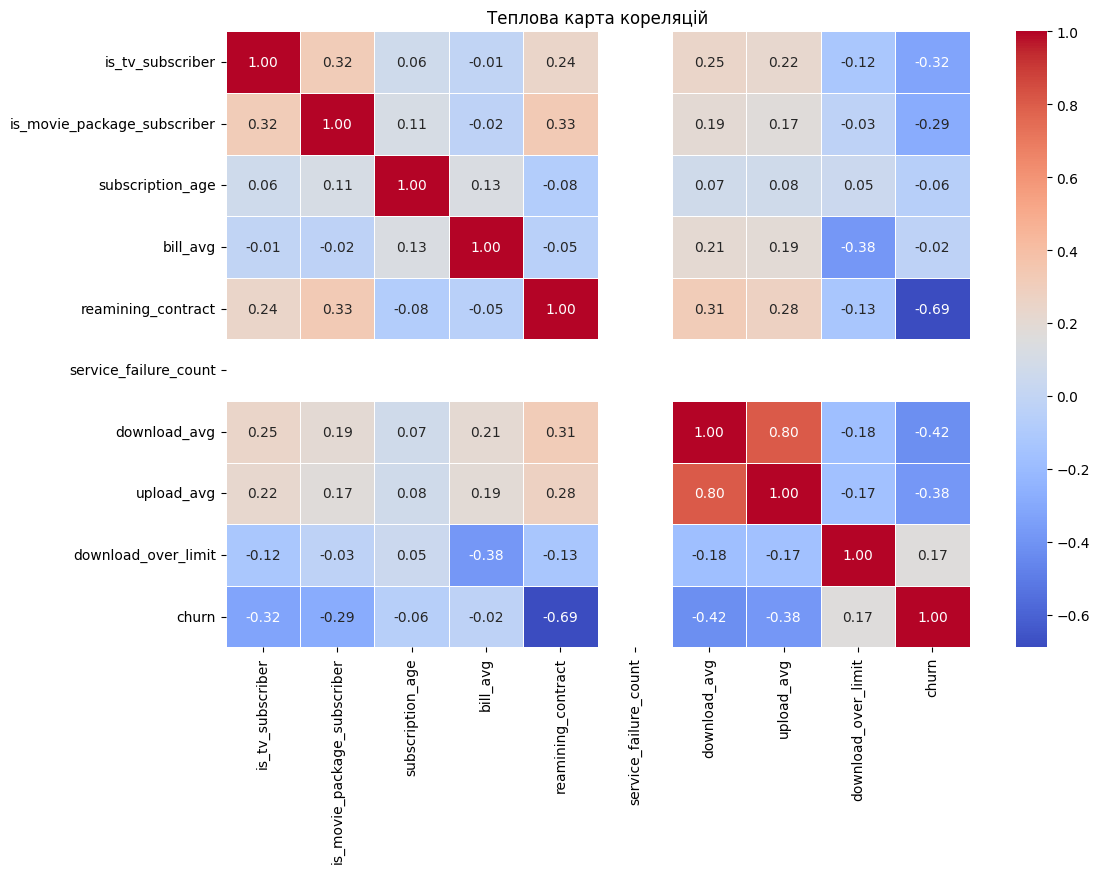

In [42]:
# Візуалізація теплової карти кореляцій
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляцій')
plt.show()

In [43]:
#Оскільки видно що на тепловій карті кореляцій відсутні дані по стовпчику service_failure_count, таке можливо у нашому випадку після проведення викиду аномалій так як там майже всі дані 0 а ті що ні відкидаються, тому думаю цей стовпчик можна прибрати
df=df.drop(columns=['service_failure_count'])

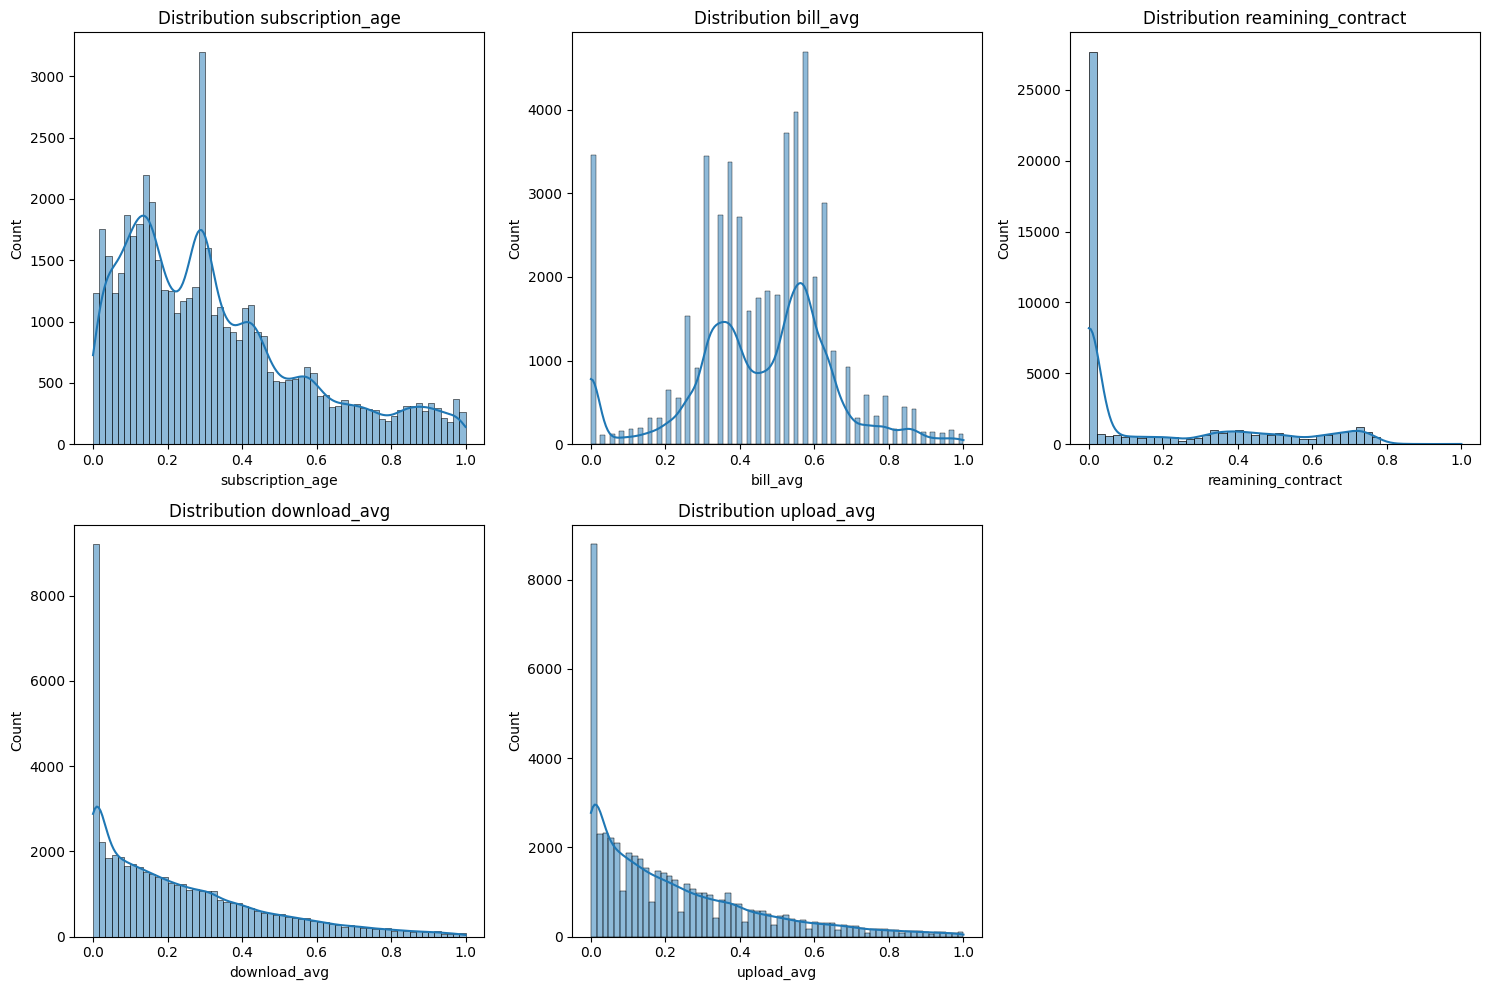

In [44]:
# Вивчення розподілів числових змінних після обробки
numeric_cols = ['subscription_age', 'bill_avg', 'reamining_contract','download_avg', 'upload_avg']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

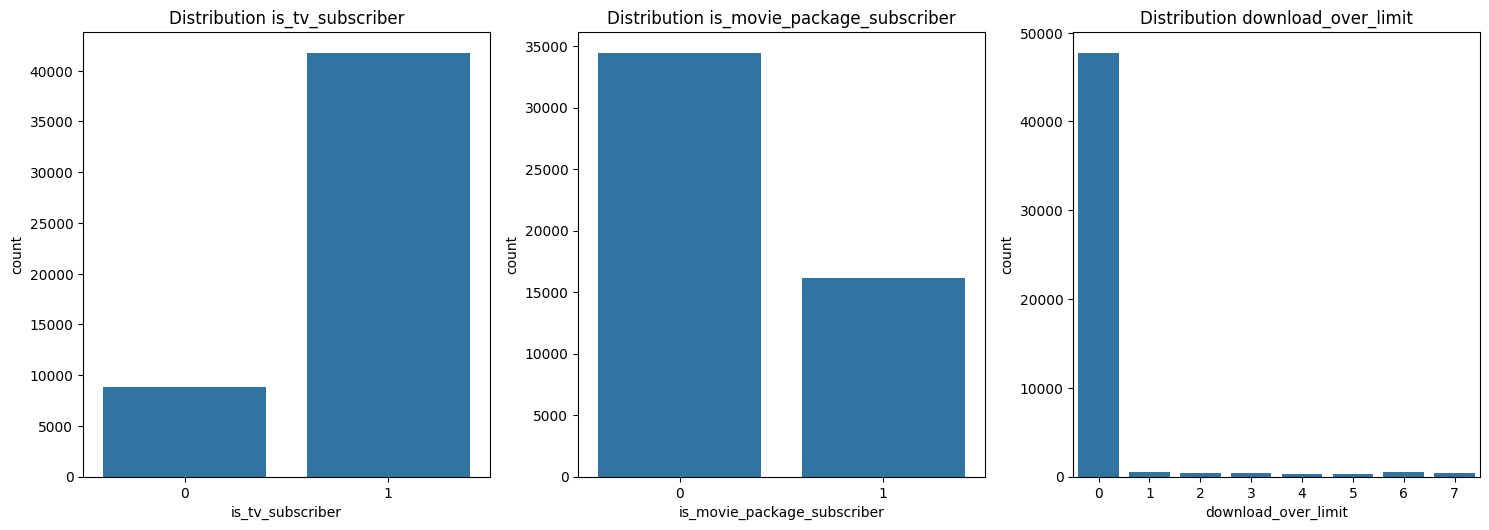

In [45]:
# Вивчення розподілів бінарних змінних
binary_cols = ['is_tv_subscriber', 'is_movie_package_subscriber', 'download_over_limit']

plt.figure(figsize=(15, 10))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

In [49]:
# Збереження DataFrame у файл CSV
df.to_csv('data.csv', index=False)